In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Dataset_a = sio.loadmat('HW9a.mat')

train_x_a = Dataset_a['train_X']
train_y_a = Dataset_a['train_y']
test_x_a = Dataset_a['test_X']
test_y_a = Dataset_a['test_y']



from sklearn import svm


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


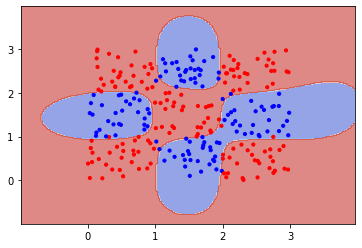

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [2]:
#select kernel function:{'rbf','poly'}
clf = svm.SVC(kernel='rbf',C=10,gamma=1,degree=2)
clf.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = train_x_a[:,0], train_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_a.reshape(270)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

clf.predict(test_x_a)

Linear Kernel

The classes are not linearly seperable, so no matter how we change C,gamma,degree the classifier classifies all values in one class.

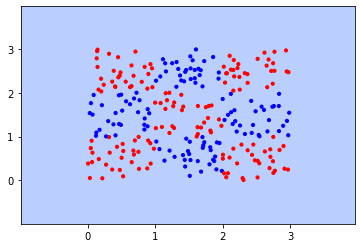

In [29]:
clf = svm.SVC(kernel='linear',C=10,gamma=1,degree=2)
clf.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = train_x_a[:,0], train_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_a.reshape(270)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_a,clf.predict(test_x_a))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

Confusion Matrix 
 [[  0 120]
 [  0 150]]
The success rate is  0.5555555555555556


Polynomial kernel

Again the classifier classifies all values in one class no matter the changes in the parameters of SVM

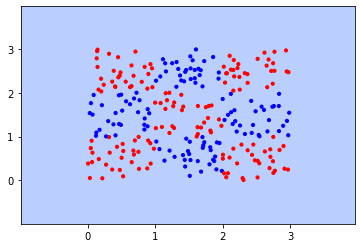

In [33]:
clf = svm.SVC(kernel='poly',C=10,gamma=1,degree=2)
clf.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = train_x_a[:,0], train_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_a.reshape(270)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_a,clf.predict(test_x_a))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

Confusion Matrix 
 [[  0 120]
 [  0 150]]
The success rate is  0.5555555555555556


rbf kernel

The degree do not affect the classifier. The gamma lowers the accuracy of the classifier as it increases. When C decreases the accuracy also decreases. When C increases the accuracy deacreases for some values and increases for some others. The maximum accuracy score that I found was 95.5%

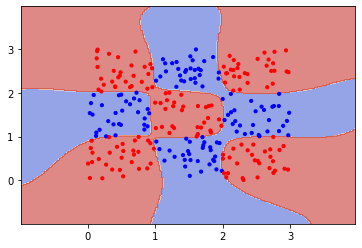

In [113]:
clf = svm.SVC(kernel='rbf',C=500000,gamma=1,degree=2)
clf.fit(train_x_a, train_y_a.reshape(270))

X00, X11 = train_x_a[:,0], train_x_a[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_a.reshape(270)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

In [114]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y_a,clf.predict(test_x_a))
print('Confusion Matrix \n',cm)
accuracy=np.diag(cm).sum()/cm.sum()
print('The success rate is ',accuracy)

Confusion Matrix 
 [[110  10]
 [  2 148]]
The success rate is  0.9555555555555556
